# Web-scraping the data from iproperty

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'https://www.iproperty.com.my/rent/mont-kiara/all-residential/?page=1'
html = requests.get(url).text

In [3]:
soup = BeautifulSoup(html,'html.parser')

In [4]:
#print(soup.prettify())

In [5]:
# find all the price per sqft
df = pd.DataFrame(soup.find_all('p',class_=False),columns=['MK_Price'])
df.head()

,MK_Price
0,(RM 3.15 per sq. ft.)
1,(RM 3.46 per sq. ft.)
2,(RM 2.69 per sq. ft.)
3,(RM 2.89 per sq. ft.)
4,(RM 3.1 per sq. ft.)


## Data Extraction and Transformation

The website iProperty.com.my has a database of 6,700 entries for rental properties within the Mont_Kiara area. Due to the limitation of the webpage being able to only access 2000 entries at a time, the extraction process will be broken up into 3 different categories based on the rental price range.

**Rental Prices below 3000** 2434 entries 

In [6]:
from tqdm import tqdm
df_mk = pd.DataFrame(columns=['Price'])
for i in tqdm (range (1,101), desc="Loading..."):
    # iterate the webpages
    url = f'https://www.iproperty.com.my/rent/mont-kiara/all-residential/?maxPrice=3500&page=i'
    # retrive the html code
    html = requests.get(url).text
    # create soup
    soup = BeautifulSoup(html,'html.parser')
    # filter data and convert to temporary dataframe
    dft = pd.DataFrame(soup.find_all('p',class_=False),columns=['Price'])
    # update main df 
    df_mk = df_mk.append(dft,ignore_index=True)

Loading...: 100%|██████████| 100/100 [01:48<00:00,  1.08s/it]


**Rental Prices between 4000 and 7000** 2279 entries

In [7]:
for i in tqdm (range (1,101), desc="Loading..."):
    # iterate the webpages
    url = f'https://www.iproperty.com.my/rent/mont-kiara/all-residential/?minPrice=4000&maxPrice=7000&page=i'
    # retrive the html code
    html = requests.get(url).text
    # create soup
    soup = BeautifulSoup(html,'html.parser')
    # filter data and convert to temporary dataframe
    dft = pd.DataFrame(soup.find_all('p',class_=False),columns=['Price'])
    # update main df 
    df_mk = df_mk.append(dft,ignore_index=True)

Loading...: 100%|██████████| 100/100 [01:49<00:00,  1.10s/it]


**Rental Prices above 7000** 2279 entries

In [14]:
for i in tqdm (range (1,74), desc="Loading..."):
    # iterate the webpages
    url = f'https://www.iproperty.com.my/rent/mont-kiara/all-residential/?minPrice=8000&page=i'
    # retrive the html code
    html = requests.get(url).text
    # create soup
    soup = BeautifulSoup(html,'html.parser')
    # filter data and convert to temporary dataframe
    dft = pd.DataFrame(soup.find_all('p',class_=False),columns=['Price'])
    # update main df 
    df_mk = df_mk.append(dft,ignore_index=True)

Loading...: 100%|██████████| 73/73 [01:19<00:00,  1.09s/it]


In [15]:
print('Successfully extracted {} entries'.format(df_mk.shape[0]))

Successfully extracted 5460 entries


**Clean the data**

In [29]:
# extract just the numeric values
df_mk.['Price'] = df_mk['Price'].apply(lambda x: x.split()[1])
# convert dtype to float
df_mk['Price'] = df_mk['Price'].astype('float')
# check dtype
df_mk.dtypes

Price    float64
dtype: object

## Data Exploration

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

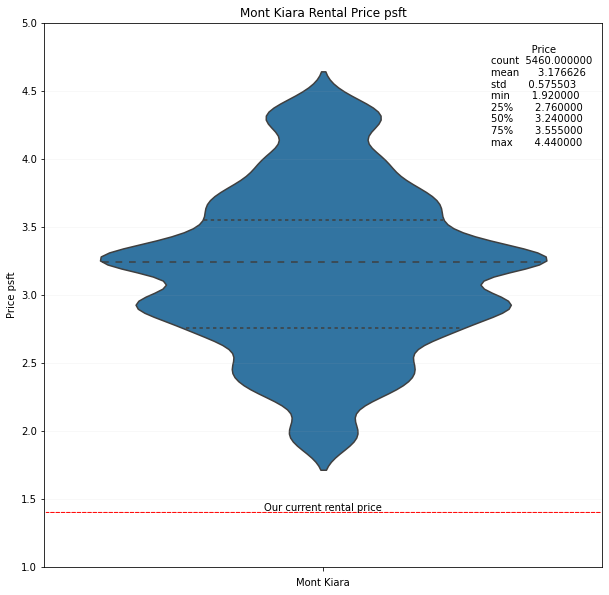

In [35]:
# create a canvas
fig, ax0 = plt.subplots(figsize=(10,10))
# plot the graph
sns.violinplot(data=df_mk, 
            #kind='violin',
            y="Price",
            inner='quartile',
            ax=ax0)

# plot the current price charging
plt.annotate('',
             xy=(-0.5,1.4),
             xytext=(0.5,1.4),
             arrowprops=dict(arrowstyle="-",connectionstyle="arc3",color='red',ls='--'))
plt.text(0,1.41,'Our current rental price',ha='center')
# annotate the box plot data
a = df_mk.describe().to_string()
plt.text(0.3,4.1,a)

# label the graph
plt.title('Mont Kiara Rental Price psft')
plt.ylabel('Price psft')
plt.ylim(1,5)
plt.xlabel('Mont Kiara')
plt.grid(axis='y',alpha=0.1)

#plt.show()
plt.savefig('MK_VIOLINPLOT.jpeg')